# Plantas Medicinales en San José Iturbide, Guanajuato, México
Analisis y visualización de datos por: Cindy Yohana Gutierrez Nestor

Base de datos original: Estudio de plantas medicinales utilizadas en San José Iturbide, Guanajuato, México. (2023). POLIBOTÁNICA, 56. https://doi.org/10.18387/polibotanica.56.14

In [7]:
import pandas as pd
import os
os.chdir('/Users/vorte/Downloads')

In [19]:
# Abriendo archivo:

df = pd.read_csv('plantas_medicinales_gto.csv')
df.head(5)

,Familia,Nombre científico,Nombre común,Parte utilizada,Enfermedad,Modo de preparación,Estado del material vegetal
0,Fabaceae,Eysenhardtia polystachya (Ortega) Sarg.,Palo azul,Hojas y tallo,Problemas de riñón; Diabetes,Infusión,Fresco y seco
1,Fabaceae,Cassia fistula L.,Hojasen,Hojas,Problemas gastrointestinales,Infusión,Fresco
2,Fabaceae,Dalea bicolor Willd.,Escoba de chivo,Hojas,Diarrea,Infusión,Fresco y seco
3,Lamiaceae,Lavandula angustifolia Mill.,Lavanda,Flor,Quemaduras; Reumatismo,Macerado; Emplasto y baño,Fresco y seco; Seco
4,Lamiaceae,Mentha spicata L.,Hierbabuena,Hojas; Toda la planta,Analgésico; Antinflamatorio; Gripe; Dolor de e...,Infusión; Cataplasma,Seco; Fresco


In [22]:
# Analisis Exploratorio:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Familia                      50 non-null     object
 1   Nombre científico            50 non-null     object
 2   Nombre común                 50 non-null     object
 3   Parte utilizada              50 non-null     object
 4   Enfermedad                   50 non-null     object
 5   Modo de preparación          50 non-null     object
 6   Estado del material vegetal  50 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB
(50, 7)


No encontramos ningun dato numérico, El Dataset cuenta con 49 registros y 7 columnas.

## Añadiendo Columnas relevantes:
Para fines de nuestro rpopio DataSet, se añadiran un par de columnas: 

1. Disponibilidad en mercados locales, como: "Disponibilidad" donde No = No_disponible y Sí = Sí disponible
2. Nivel de popularidad, como: "Popularidad" donde, 1-popularidad casi nula, 2-Neutral y 3-Muy popular

In [27]:
# Añadir columnas vacías
df["Disponibilidad"] = ""  # Sí  / No
df["Popularidad"] = ""     # Escala 1 a 5

# Guardar versión actualizada
df.to_csv("plantas_medicinales_gto_extendido.csv", index=False)

# abriendo nuevo CSV:
df = pd.read_csv('plantas_medicinales_gto_extendido.csv')
df.head()

,Familia,Nombre científico,Nombre común,Parte utilizada,Enfermedad,Modo de preparación,Estado del material vegetal,Disponibilidad,Popularidad
0,Fabaceae,Eysenhardtia polystachya (Ortega) Sarg.,Palo azul,Hojas y tallo,Problemas de riñón; Diabetes,Infusión,Fresco y seco,NaN,NaN
1,Fabaceae,Cassia fistula L.,Hojasen,Hojas,Problemas gastrointestinales,Infusión,Fresco,NaN,NaN
2,Fabaceae,Dalea bicolor Willd.,Escoba de chivo,Hojas,Diarrea,Infusión,Fresco y seco,NaN,NaN
3,Lamiaceae,Lavandula angustifolia Mill.,Lavanda,Flor,Quemaduras; Reumatismo,Macerado; Emplasto y baño,Fresco y seco; Seco,NaN,NaN
4,Lamiaceae,Mentha spicata L.,Hierbabuena,Hojas; Toda la planta,Analgésico; Antinflamatorio; Gripe; Dolor de e...,Infusión; Cataplasma,Seco; Fresco,NaN,NaN


## Manejo de datos nulos:
Ahora con mucha paciencia vamos a rellenar estos datos con base en mi propia experiencia en los mercados, para ello se utilizara una metodología de listas como se muestra a continuación:

In [41]:
# visualizando todos los nombres comunes de las plantas en un array para su facil manejo en las futuras listas
import numpy as np
nombres = np.array(df['Nombre común'])
nombres

array(['Palo azul', 'Hojasen', 'Escoba de chivo', 'Lavanda',
       'Hierbabuena', 'Vaporud', 'Romero', 'Tomillo', 'Menta', 'Poleo',
       'Orégano', 'Marrubio', 'Sábila', 'Manzanilla', 'Árnica', 'Ajenjo',
       'Chilcuague', 'Simonillo', 'San Nicolas', 'Canela', 'Laurel',
       'Ruda', 'Limón', 'Naranjo', 'Epazote', 'Sangre de drago',
       'Ortiguilla', 'Flor de la golondrina', 'Eucalipto', 'Clavo',
       'Abrojo', 'Gobernadora', 'Hierba de San Antonio',
       'Hierba de San Juan', 'Valeriana', 'Tilia', 'Higo',
       'Hierba de sapo', 'Cedrón', 'Ajo', 'Cúrcuma', 'Oreja de ratón',
       'Mariola', 'Hierba del golpe', 'Gordolobo', 'Hoja de uva',
       'Buganvilia', 'Ortiga', 'Cola de caballo', 'Marihuana'],
      dtype=object)

In [49]:
# Creación de listas de disponibilidad:
si_disponible = [
    'Lavanda','Hierbabuena', 'Vaporud', 'Romero', 'Tomillo', 'Menta', 'Poleo','Orégano','Sábila', 'Manzanilla', 
    'Árnica','Chilcuague','Canela', 'Laurel','Ruda', 'Limón', 'Naranjo', 'Epazote','Eucalipto', 'Clavo',
    'Hierba de San Juan','Higo','Ajo', 'Cúrcuma','Gordolobo','Ortiga', 'Cola de caballo']

no_disponible = []
for planta in nombres:
    if planta not in(si_disponible):
        no_disponible.append(planta)
    else: pass

# Comprovando la correcta creación de la lista.
print(no_disponible)

['Palo azul', 'Hojasen', 'Escoba de chivo', 'Marrubio', 'Ajenjo', 'Simonillo', 'San Nicolas', 'Sangre de drago', 'Ortiguilla', 'Flor de la golondrina', 'Abrojo', 'Gobernadora', 'Hierba de San Antonio', 'Valeriana', 'Tilia', 'Hierba de sapo', 'Cedrón', 'Oreja de ratón', 'Mariola', 'Hierba del golpe', 'Hoja de uva', 'Buganvilia', 'Marihuana']


### Disclimer:
Desgraciadamente no contamos con una encuesta que demuestre los niveles de popularidad para cada planta en Guanajuato, por lo que en los futuros graficos, entiendase esta columna como ficticia y unicamente para fines de desarrollo de este proyecto de portafolio.

In [58]:
# Creación de listas de popularidad:
pop_1 = ['Vaporud','Palo azul','Escoba de chivo','Marrubio','Flor de la golondrina','Abrojo','Tilia', 
         'Hierba de sapo','Oreja de ratón', 'Mariola', 'Hierba del golpe',]

pop_2 =['Hojasen', 'Poleo','Ajenjo','Simonillo','San Nicolas','Sangre de drago','Ortiguilla',
        'Hierba de San Juan','Gobernadora', 'Hierba de San Antonio', 'Valeriana',
        'Cedrón','Gordolobo', 'Ortiga', 'Cola de caballo','Hoja de uva']

pop_3 = ['Lavanda', 'Hierbabuena','Romero', 'Tomillo', 'Menta','Orégano', 'Sábila', 'Manzanilla', 'Árnica', 
         'Chilcuague', 'Canela', 'Laurel', 'Ruda', 'Limón', 'Naranjo', 'Epazote', 'Eucalipto', 'Clavo','Higo',
         'Ajo', 'Cúrcuma','Buganvilia', 'Marihuana']

In [99]:
# Rellenado de datos nulos en la columna de disponibilidad:

df.loc[df['Nombre común'].isin(si_disponible),'Disponibilidad'] = 'Sí'
df.loc[df['Nombre común'].isin(no_disponible), 'Disponibilidad'] = 'No'

# Rellenado de datos nulos en la columna de popularidad:
df.loc[df['Nombre común'].isin(pop_1), 'Popularidad'] = 1
df.loc[df['Nombre común'].isin(pop_2), 'Popularidad'] = 2
df.loc[df['Nombre común'].isin(pop_3), 'Popularidad'] = 3

# Corroborando que no queden datos nulos:
df[df['Disponibilidad'].isna()]
df[df['Popularidad'].isna()]

,Familia,Nombre científico,Nombre común,Parte utilizada,Enfermedad,Modo de preparación,Estado del material vegetal,Disponibilidad,Popularidad


Con este paso, tenemos un Dataset completo, limpio y listo para analizarse.

## Visualización de datos para su analisis

In [110]:
# Cuantas familias diferentes hay:
fams = df['Familia'].nunique()
print(f'Hay {fams} familias diferentes')

Hay 27 familias diferentes


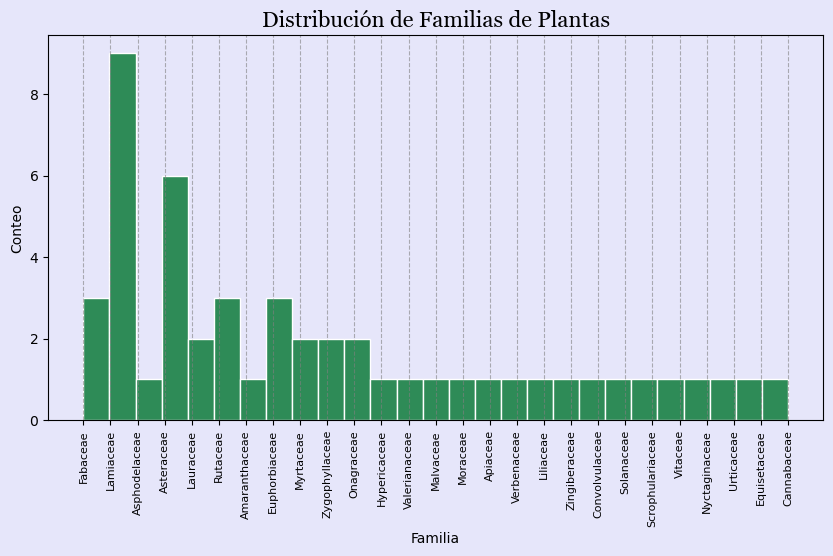

In [276]:
# Graficando la distribución de familias de plantas medicinales de Guanajuato:

plt.figure(figsize = (10,5), facecolor= 'lavender')
plt.gca().set_facecolor('lavender')
plt.hist(df['Familia'], bins = 27, edgecolor= 'white', color = 'seagreen')
plt.title('Distribución de Familias de Plantas', fontsize = 16, fontname = 'Georgia')
# for i, valor in enumerate(df['Familia']):
# plt.text(df['Familia'][i], valor, str(df['Familia'].valuecounts()))
plt.xlabel('Familia')
plt.ylabel('Conteo')
plt.xticks(rotation=90, fontsize = 8)
plt.grid(axis = 'x', color='gray', linestyle = '--',alpha = 0.6)

plt.show()

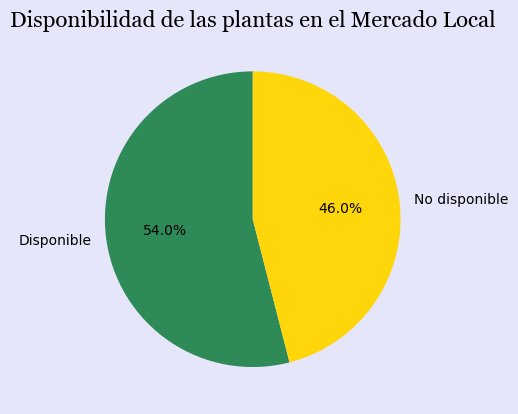

In [426]:
# Disponibilidad de plantas en el mercado

plt.figure(facecolor= 'lavender')
plt.pie(df['Disponibilidad'].value_counts(), autopct= '%0.1f%%', labels = ['Disponible','No disponible'], colors =['seagreen','#FFD60A'],startangle = 90)
plt.title('Disponibilidad de las plantas en el Mercado Local',  fontsize = 16, fontname = 'Georgia')
plt.show()

In [304]:
# Top 10 Plantas con más usos medicinales y su disponibilidad en los mercados:

# Separar por punto y coma y quitar espacios
enfermedades = df["Enfermedad"].str.split(";")
enfermedades = enfermedades.apply(lambda x: [e.strip() for e in x])

# contando 
conteo_enfermedades = enfermedades.apply(lambda x: len(x))

# Creacion de una nueva columna que incluya el conteo de enfermedades que trata cada planta
df['Num enfermedades'] = conteo_enfermedades

# Creación de un nuevo DF que contiene solo el top 10:
df_top10_plantas = df.sort_values(by ='Num enfermedades', ascending =  False).head(10)

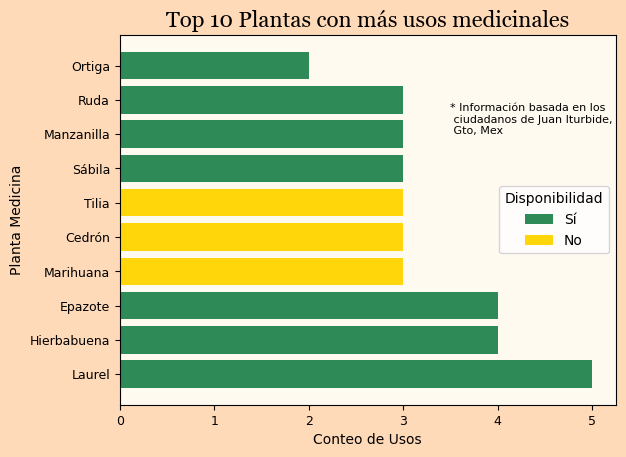

In [342]:
# Graficación:

# Añadiendo colores distintos de acuerdo a su disponibilidad:
color_map = {'Sí':'seagreen', 'No':'#FFD60A'}
colores = df_top10_plantas['Disponibilidad'].map(color_map)

plt.figure(facecolor= 'peachpuff')
plt.gca().set_facecolor('floralwhite')
plt.barh(df_top10_plantas['Nombre común'],df_top10_plantas['Num enfermedades'], color = colores )
plt.title('Top 10 Plantas con más usos medicinales', fontsize=16,fontname = 'Georgia')
plt.xlabel('Conteo de Usos')
plt.xticks(fontsize = 9)
plt.ylabel('Planta Medicina')
plt.yticks(fontsize = 9)
plt.text(3.5, 7,'* Información basada en los \n ciudadanos de Juan Iturbide, \n Gto, Mex', fontsize = 8)

# Creando las leyendas:
from matplotlib.patches import Patch
leyenda = [Patch(facecolor = 'seagreen', label = 'Sí'),Patch(facecolor = '#FFD60A', label = 'No')]
plt.legend(handles = leyenda, title = 'Disponibilidad', loc = 'center right')

plt.show()

In [350]:
# Top 10 usos medicinales más comunes

# Juntando todos los padecimientos para encontrar cuales son los que más se repiten
todas_enfermedades = np.concatenate(enfermedades.values)

# Contando cuantas veces se repite cada enfermedad
conteo_enfermedades = pd.Series(todas_enfermedades).value_counts()

# Creación de un nuevo DF solo para este grafico y no añadir asi mas columnas inecesarias al DF previo
df_top10_enfermedades = (conteo_enfermedades.head(10).reset_index())
df_top10_enfermedades.columns = ['Enfermedad', 'Frecuencia']

,Enfermedad,Frecuencia
0,Dolor de estómago,9
1,Problemas respiratorios,6
2,Problemas gastrointestinales,6
3,Fiebre,6
4,Diarrea,4
5,Reumatismo,4
6,Ansiedad,4
7,Problemas de riñón,3
8,Quemaduras,3
9,Gripe,3


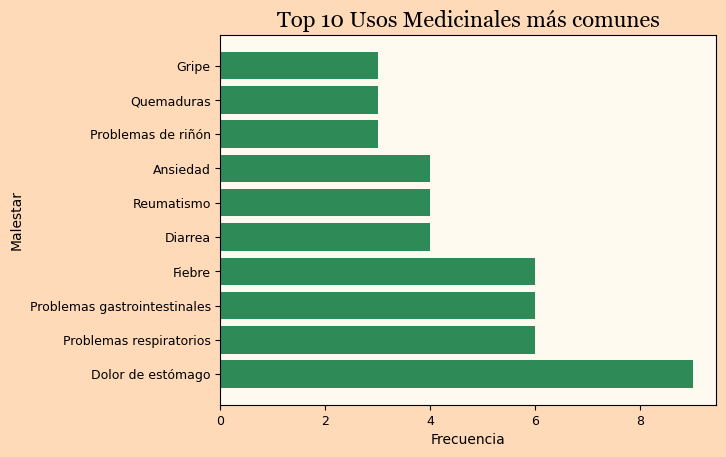

In [358]:
# Graficación:

plt.figure(facecolor='peachpuff')
plt.gca().set_facecolor('floralwhite')
plt.barh(df_top10_enfermedades['Enfermedad'],df_top10_enfermedades['Frecuencia'], color='seagreen')
plt.title('Top 10 Usos Medicinales más comunes', fontsize = 16, fontname='Georgia')
plt.xlabel('Frecuencia')
plt.xticks(fontsize = 9)
plt.ylabel('Malestar')
plt.yticks(fontsize = 9)
plt.show()

In [362]:
# Relación Entre la parte utilizada y el modo de preparación

# Contar las combinaciones
df_grouped = df.groupby(['Parte utilizada', 'Modo de preparación']).size().reset_index(name='count')

# Crear tabla pivote para que cada modo sea una columna
pivot_df = df_grouped.pivot(index='Parte utilizada', columns='Modo de preparación', values='count').fillna(0)

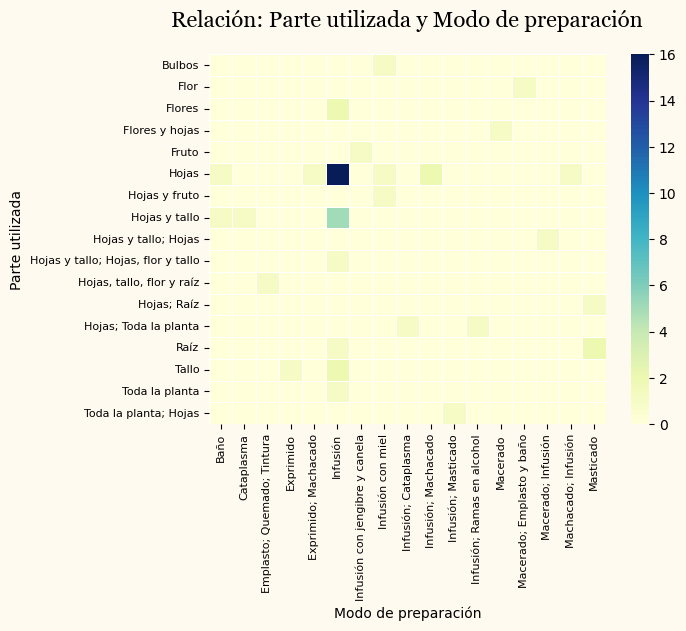

In [434]:
# Graficando:

import seaborn as sns

plt.figure(facecolor='floralwhite')
sns.heatmap(pivot_df, cbar_ax=None,cmap='YlGnBu', linewidths=0.5, annot= None)
plt.title('Relación: Parte utilizada y Modo de preparación', pad = 20,fontsize = 16, fontname='Georgia')
plt.xticks(fontsize = 8)
plt.yticks(fontsize= 8)
plt.show()

C:\Users\vorte\AppData\Local\Temp\ipykernel_11268\1860807983.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



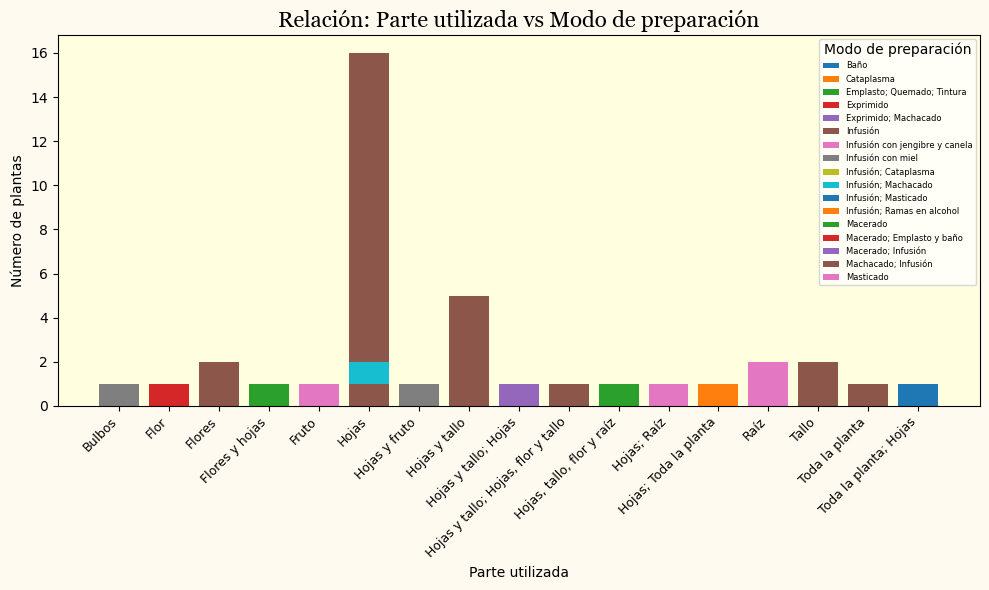

In [422]:
# En vista que se repite mucho unicamente la mezcla hojas-infusión, haremos otro tipo de grafico (barras) para que sea más claro:

# Índices de las barras
partes = pivot_df.index

fig, ax = plt.subplots(figsize=(10,6))

# Dibujar cada modo de preparación como un grupo de barras
for i, modo in enumerate(pivot_df.columns):
    ax.bar(partes, pivot_df[modo], label=modo)

# Personalización
ax.set_xlabel('Parte utilizada')
ax.set_ylabel('Número de plantas')
ax.set_title('Relación: Parte utilizada vs Modo de preparación', fontsize=16, fontname='Georgia')
ax.set_xticklabels(partes, rotation=45, ha='right', fontsize=9)
ax.legend(title='Modo de preparación', loc = 'upper right', fontsize = 6)
ax.set_facecolor('lightyellow')
fig.patch.set_facecolor('floralwhite')

plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de barras “Nivel de popularidad”

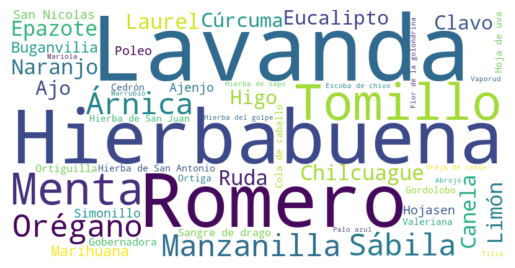

In [442]:
# Gráfico de barras “Nivel de popularidad”

# importación de la librería, en caso de que el modulo no este instalado:
# !pip install wordcloud
from wordcloud import WordCloud

# Diccionario con planta: popularidad
data = dict(zip(df['Nombre común'], df['Popularidad']))

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusiones:
1. La mayoria de las plantas en la lista son de la familia "Lamiaceae"
2. Solo el 54% de las plantas estan disponibles en el mercado Local
3. El Laurel, la Hierbabuena y el Epazote son las plantas más versatiles al lideral el Top de cantidad de usos medicinales por planta. Recordemos que esta información es de acuerdo a los usos dado por los ciudadanos de Juan Iturbide Guanajuato, ya que plantas como el Romero que es conocida por sus multiples usos, extrñamente no se encuentra en el Top 10.
4. Los 3 usos medicinales más comunes que podemos aliviar con plantas son los siguientes: Dolor de panza, Malestares respiratorios y Malestares gastrointestinales.
5. Existen mas de 12 metodos de preparación en los que a su vez, se utilizan diferentes partes de la planta, desde raíz hasta flores, por lo cual no basta con saber el nombre de la planta y lo que cura para "automedicarse", siempre es mejor mantenerse informado.
6. El metodo más común por mucho para el uso de estas plantas medicinales es, la infusion de las hojas, repitiendose 16 veces de los 49 de los remedios, lo cual aunque no supere la mitas es muy representativo tomando en cuenta que muchas de las plantas tienen preparaciones únicas.
7. Por último: La imagen WordCloud, muestra las plantas mas populares por su tamaño grande y las menos populares en tamaño pequeño, sin embargo este nivel de popularidad ha sido dado por mi interpretación, ya que en la información original no contamos con esta información , es decir, hace falta una encuesta para obtener este dato.

# Aplicaciones:
Aunque no represente al completo de las plantas Mexicanas este dataset y todos los insights obtenidos de este Analisis de datos, pueden cumplir muchos propositos:
1. Usos culturales: Dar a conocer todas las plantas con niveles de popularidad más bajos
2. Venta Directa: Asegurar la disponibilidad de las plantas más versatiles (y quiza la convinación entre versatiles y populares) en el mercado, ya sea local, farmaceutico o como producto para minisupers y mercados más formales.
3. Venta indirecta: Uso de las plantas como ingretientes en formulas más naturales de diversos productos
4. Uso casero: por su puesto expandir esta información y hacerla llegar a quien más lo necesite.